In [1]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

import os
import sys
import cv2
import shutil
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import multiprocessing as mp
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, cohen_kappa_score
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Input


def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed = 0
seed_everything(seed)


sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train_df = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/test.csv')
print('Number of train samples: ', train_df.shape[0])
print('Number of test samples: ', test_df.shape[0])
display(train_df.head())

Number of train samples:  3662
Number of test samples:  1928


id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

In [ ]:
train, validation = train_test_split(train_df, test_size=0.2, random_state=seed)

In [ ]:
train['set'] = 'train'
validation['set'] = 'validation'
train_complete = train.append(validation)
train_complete.head()
train_complete.to_csv('hold-out.csv', index=False)
train_complete.head()

id_code  diagnosis    set
1236  55eac26bd383          1  train
962   44e0d56e9d42          2  train
2447  aa4407aab872          0  train
2991  cffc50047828          0  train
2559  b0f0fa677d5f          0  train

In [ ]:
train_complete.to_csv('/content/gdrive/My Drive/tesis2/hold-out.csv')

In [4]:
train_df = pd.read_csv('/content/gdrive/My Drive/tesis2/hold-out.csv')

In [5]:
train_df.head(10)

Unnamed: 0       id_code  diagnosis    set
0        1236  55eac26bd383          1  train
1         962  44e0d56e9d42          2  train
2        2447  aa4407aab872          0  train
3        2991  cffc50047828          0  train
4        2559  b0f0fa677d5f          0  train
5         728  345b1f0abbba          0  train
6        2472  ab7991df166b          0  train
7        2911  ca63fe4f4b52          1  train
8        2572  b200c23b299b          0  train
9        1675  76bc31e0d3be          0  train

In [6]:
x_train = np.load('/content/gdrive/My Drive/tesis/aptos/train224c.npy')

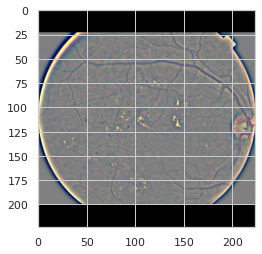

In [7]:
plt.imshow(x_train[0])

In [8]:
X_train = train_df[train_df['set'] == 'train']
X_val = train_df[train_df['set'] == 'validation']

In [9]:
x_train_index =np.array(X_train['Unnamed: 0'])
x_val_index = np.array(X_val['Unnamed: 0'])

In [10]:
y_train = pd.get_dummies(train_df['diagnosis']).values

In [11]:
print(len(X_train))
print(len(X_val))

2929
733


In [12]:
x_train1 = np.empty((2929,224,224,3),dtype='uint8')
x_val1 = np.empty((733,224,224,3),dtype='uint8')

y_train1 =  np.empty((2929,5),dtype='uint8')
y_val1 = np.empty((733,5),dtype='uint8')

for i in range(len(x_train_index)):
  x_train1[i] = x_train[x_train_index[i]]
  y_train1[i] = y_train[x_train_index[i]]

for j in range(len(x_val_index)):
  x_val1[j] = x_train[x_val_index[j]]
  y_val1[j] = y_train[x_val_index[j]]

In [13]:
y_train1 = pd.get_dummies(X_train['diagnosis']).values
y_val1 = pd.get_dummies(X_val['diagnosis']).values

In [15]:
X_train[:30]

Unnamed: 0       id_code  diagnosis    set
0         1236  55eac26bd383          1  train
1          962  44e0d56e9d42          2  train
2         2447  aa4407aab872          0  train
3         2991  cffc50047828          0  train
4         2559  b0f0fa677d5f          0  train
5          728  345b1f0abbba          0  train
6         2472  ab7991df166b          0  train
7         2911  ca63fe4f4b52          1  train
8         2572  b200c23b299b          0  train
9         1675  76bc31e0d3be          0  train
10        3038  d2cd47ed2c1d          0  train
11        3232  e12d41e7b221          2  train
12        2346  a4359815f152          2  train
13         905  417f408ee8e0          2  train
14         748  35ac70c0d08f          0  train
15         924  42b9c1977681          0  train
16         641  2d3f4094c08a          0  train
17        1646  7455e2b5fc57          2  train
18        2088  92889b863ae6          0  train
19        2530  af133a85ea0c          1  train
20        1450  65e51e18242b          1  train
21        3617  fcc55ae641ae          2  train
22        1386  613bacb35c05          1  train
23         559  27b68863349f          2  train
24        2203  9ac2e3e9fca5          0  train
25        3133  d994203deb64          2  train
26         385  1c4f3aa4df06          4  train
27        1999  8c4ceddeb1c6          0  train
28         861  3e1f8fecb06f          2  train
29        2931  cb39761f0712          0  train

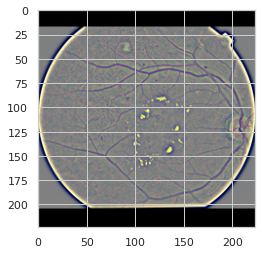

In [16]:
plt.imshow(x_train1[21])

In [17]:
y_train1[:2]

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [18]:
X_val[:30]

Unnamed: 0       id_code  diagnosis         set
2929        2596  b460ca9fa26f          0  validation
2930        1548  6cee2e148520          0  validation
2931        2912  ca6842bfcbc9          1  validation
2932        1544  6cbc3dad809c          2  validation
2933        2438  a9bc2f892cb3          0  validation
2934         898  40e9b5630438          1  validation
2935        3297  e4e343eaae2a          2  validation
2936        3513  f4d3777f2710          2  validation
2937         224  10a5026eb8e6          0  validation
2938        3121  d8da9de62743          0  validation
2939        2192  9a3109657ac1          1  validation
2940        3203  df0886f1e76b          0  validation
2941        1922  876deb29f000          0  validation
2942        1501  6987804eb464          2  validation
2943        2115  94a67ec0714f          2  validation
2944        3463  f06e7a9df795          0  validation
2945        1387  6155cf375354          0  validation
2946        3090  d74ccc796517          0  validation
2947         958  44976c3b11a6          0  validation
2948        1069  4c5ab774a381          0  validation
2949        1118  4ec7796df40e          0  validation
2950        2947  cc964bf04dbc          0  validation
2951         569  28503940d10b          0  validation
2952        1691  77a9538b8362          1  validation
2953        2360  a505981d1cab          2  validation
2954        3587  fa3e544a7401          2  validation
2955         682  308f7fce6f0d          2  validation
2956        3003  d144144a2f3f          2  validation
2957         192  0e0fc1d9810c          4  validation
2958         443  1f3f32efaf20          0  validation

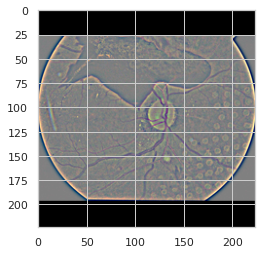

In [19]:
plt.imshow(x_val1[28])

In [20]:
y_val1[:10]

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [21]:
print(x_train1.shape)
print(x_val1.shape)
print(y_train1.shape)
print(y_val1.shape)

(2929, 224, 224, 3)
(733, 224, 224, 3)
(2929, 5)
(733, 5)


In [22]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import DenseNet121
#from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tqdm import tqdm

In [23]:
weights_path_list = ['/content/gdrive/My Drive/tesis2/filter_effNetB5_fold0.h5', '/content/gdrive/My Drive/tesis2/filter_effNetB5_fold1.h5',
                     '/content/gdrive/My Drive/tesis2/filter_effNetB5_fold2.h5', '/content/gdrive/My Drive/tesis2/filter_effNetB5_fold3.h5',
                     '/content/gdrive/My Drive/tesis2/filter_effNetB5_fold4.h5']

In [24]:
def ensemble_preds(model_list, generator):
    preds_ensemble = []
    for model in model_list:
        generator.reset()
        preds = model.predict(generator, verbose = 1)
        preds_ensemble.append(preds)
        generator.reset()

    return np.mean(preds_ensemble, axis=0)


def apply_tta(model, generator, steps=5):
    step_size = generator.n//generator.batch_size
    preds_tta = []
    for i in range(steps):
        generator.reset()
        preds = model.predict_generator(generator, steps=step_size)
        preds_tta.append(preds)

    return np.mean(preds_tta, axis=0)

def test_ensemble_preds(model_list, generator, steps=5):
    preds_ensemble = []
    for model in model_list:
        preds = apply_tta(model, generator, steps)
        preds_ensemble.append(preds)

    return np.mean(preds_ensemble, axis=0)


In [25]:
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)


In [26]:
data_generator = train_datagen.flow(x_train1, y_train1, batch_size=1, seed=2020)
vdata_gen =  test_datagen.flow(x_val1, y_val1, batch_size=1, seed=2020)

In [27]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras import applications
from keras import optimizers,Model,Sequential

In [28]:
pip install -U efficientnet

     |████████████████████████████████| 51kB 3.9MB/s 


In [29]:
import efficientnet.keras as efn 

In [30]:
def create_model(input_shape, n_out, weights_path):
    input_tensor = Input(shape=input_shape)
    base_model = efn.EfficientNetB5(weights=None,include_top=False,input_tensor=input_tensor)
    #base_model = applications.ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)
    #base_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    final_output = Dense(n_out, activation='softmax', name='final_output')(x)
    model = Model(input_tensor, final_output)

    model.load_weights(weights_path)
    return model

In [31]:
model_list = []

for weights_path in weights_path_list:
  model_list.append(create_model(input_shape=(224, 224, 3), n_out=5, weights_path= weights_path))

In [47]:
vdata_gen.reset()

x_vdata = np.zeros((733,224, 224, 3))
y_val2 = np.array([[0,0,0,0,0]])

for i in range(733):
  y_val2 =np.append(y_val2, vdata_gen[i][1], axis=0)
  x_vdata[i]= vdata_gen[i][0]

y_val2 = np.delete(y_val2,0, axis=0)

vdata_gen.reset()

In [48]:
val_gen1 = [np.argmax(pred) for pred in y_val2]
val_gen1

[2,
 0,
 2,
 2,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 4,
 0,
 0,
 4,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 4,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 4,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 4,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 2,
 2,
 0,
 0,
 0,
 4,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 3,
 0,
 4,
 4,
 0,
 4,
 2,
 3,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 4,
 1,
 2,
 3,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 4,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 3,
 0,
 0,
 0,
 1,
 0,
 4,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 4,
 0,
 2,
 4,
 2,
 0,
 3,


In [49]:
preds_ensemble = []

In [50]:
val_preds_model1 = model_list[0].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model1)
val_preds_model1 = [np.argmax(pred) for pred in val_preds_model1]


23/23 [==============================] - 2s 68ms/step


In [51]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model1, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.942


In [52]:
val_preds_model2 = model_list[1].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model2)
val_preds_model2 = [np.argmax(pred) for pred in val_preds_model2]

23/23 [==============================] - 2s 68ms/step


In [53]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model2, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.936


In [54]:
val_preds_model3 = model_list[2].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model3)
val_preds_model3 = [np.argmax(pred) for pred in val_preds_model3]

23/23 [==============================] - 2s 68ms/step


In [55]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model3, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.933


In [56]:
val_preds_model4 = model_list[3].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model4)
val_preds_model4 = [np.argmax(pred) for pred in val_preds_model4]

23/23 [==============================] - 2s 68ms/step


In [57]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model4, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.937


In [58]:
val_preds_model5 = model_list[4].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model5)
val_preds_model5 = [np.argmax(pred) for pred in val_preds_model5]

23/23 [==============================] - 2s 68ms/step


In [59]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model5, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.928


In [60]:
preds_ensemble=np.mean(preds_ensemble, axis=0)
preds_ensemble = [np.argmax(pred) for pred in preds_ensemble]

In [61]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(preds_ensemble, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.943
